In [27]:
%env CUDA_LAUNCH_BLOCKING=1

env: CUDA_LAUNCH_BLOCKING=1


TF Version:  2.17.1
TF Hub version:  0.16.1
Eager mode enabled:  True
GPU available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


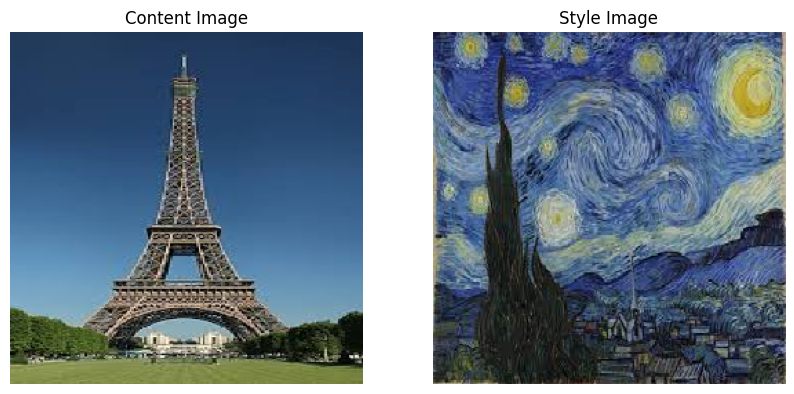

Loading Style Transfer Model from TensorFlow Hub...
Performing Style Transfer...


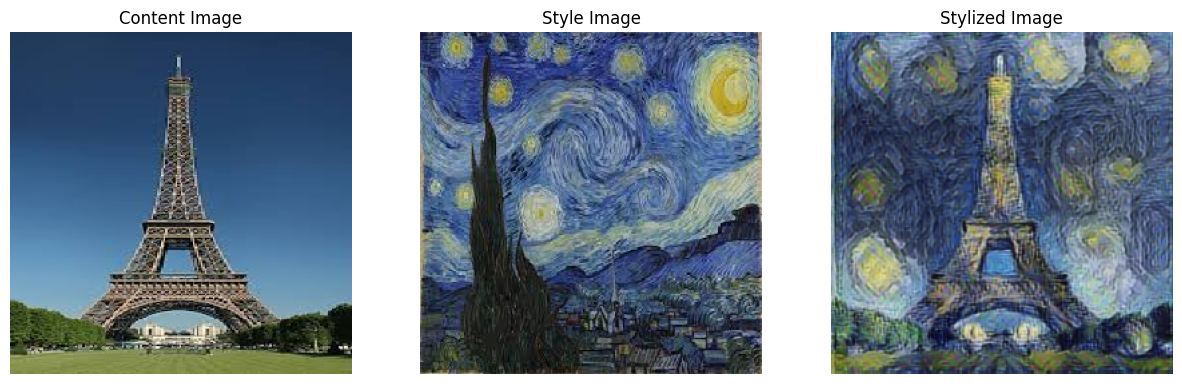

Mean Squared Error (MSE) between Content and Stylized Image: 0.03396271541714668
Loading Style Transfer Model from TensorFlow Hub...
Performing Style Transfer...
Style Image Size: 128x128 - MSE: 0.0638263002038002
Loading Style Transfer Model from TensorFlow Hub...
Performing Style Transfer...
Style Image Size: 256x256 - MSE: 0.03396271541714668
Loading Style Transfer Model from TensorFlow Hub...
Performing Style Transfer...
Style Image Size: 512x512 - MSE: 0.028587715700268745
Best Style Image Size: 512x512 with MSE: 0.028587715700268745
Stylized Image Saved at: /content/stylized_image.png


In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
import seaborn as sns

print("TF Version: ", tf.__version__)
print("TF Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())
print("GPU available: ", tf.config.list_physical_devices('GPU'))


def load_image(image_path, target_size=(256, 256)):
    img = tf.keras.utils.load_img(image_path, target_size=target_size)
    img = tf.keras.utils.img_to_array(img) / 255.0  # Normalize to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def visualize_images(content_img, style_img):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(content_img[0])
    plt.title("Content Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(style_img[0])
    plt.title("Style Image")
    plt.axis("off")
    plt.show()

def perform_style_transfer(content_image, style_image):
    print("Loading Style Transfer Model from TensorFlow Hub...")
    hub_module = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

    print("Performing Style Transfer...")
    outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
    stylized_image = outputs[0].numpy()

    return stylized_image

def visualize_results(content_image, style_image, stylized_image):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(content_image[0])
    plt.title("Content Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(style_image[0])
    plt.title("Style Image")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(stylized_image[0])
    plt.title("Stylized Image")
    plt.axis("off")

    plt.show()

content_image_path = "/content/content.jpg"
style_image_path = "/content/starry night.jpg"

content_image = load_image(content_image_path)
style_image = load_image(style_image_path)


visualize_images(content_image, style_image)


stylized_image = perform_style_transfer(content_image, style_image)

visualize_results(content_image, style_image, stylized_image)

def evaluate_model(content_image, stylized_image):
    mse = tf.reduce_mean(tf.square(content_image - stylized_image))
    print(f"Mean Squared Error (MSE) between Content and Stylized Image: {mse.numpy()}")

evaluate_model(content_image, stylized_image)

def tune_hyperparameters(style_image_sizes):
    best_mse = float("inf")
    best_size = None
    for size in style_image_sizes:
        resized_style_image = tf.image.resize(style_image, (size, size))
        stylized_image = perform_style_transfer(content_image, resized_style_image)
        mse = tf.reduce_mean(tf.square(content_image - stylized_image))
        print(f"Style Image Size: {size}x{size} - MSE: {mse.numpy()}")
        if mse.numpy() < best_mse:
            best_mse = mse.numpy()
            best_size = size
    print(f"Best Style Image Size: {best_size}x{best_size} with MSE: {best_mse}")


tune_hyperparameters([128, 256, 512])


output_path = "/content/stylized_image.png"
plt.imsave(output_path, stylized_image[0])
print(f"Stylized Image Saved at: {output_path}")


In [12]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
import seaborn as sns

print("TF Version: ", tf.__version__)
print("TF Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())
print("GPU available: ", tf.config.list_physical_devices('GPU'))


TF Version:  2.17.1
TF Hub version:  0.16.1
Eager mode enabled:  True
GPU available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
pip install fiftyone

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of motor to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 943.1/943.1 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [21]:
pip install pytorch-fid


In [1]:

!unzip -q "/content/style_images.zip" -d "/content/dataset"


In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


dataset_path = "/content/dataset/style_images"


dataset = datasets.ImageFolder(root=dataset_path, transform=transform)


train_loader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=2)


print("Classes:", dataset.classes)



Classes: ['da_vinci', 'pablo_picasso', 'van_gogh']


In [5]:
import os
import shutil
import fiftyone.zoo as foz
from tqdm import tqdm

# Load the COCO dataset
dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=[],
    classes=["person", "car"],
    max_samples=50
)


output_dir = "/content/coco_content_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save images locally
for i, sample in tqdm(enumerate(dataset)):
    img_path = sample.filepath
    img_name = f"image_{i+1}.jpg"
    save_path = os.path.join(output_dir, img_name)
    shutil.copy(img_path, save_path)



INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [2.6s elapsed, 0s remaining, 879.6Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [2.6s elapsed, 0s remaining, 879.6Mb/s]      


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Downloading 50 images


 100% |████████████████████| 50/50 [5.6s elapsed, 0s remaining, 9.5 images/s]       


INFO:eta.core.utils: 100% |████████████████████| 50/50 [5.6s elapsed, 0s remaining, 9.5 images/s]       


Writing annotations for 50 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 50 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |███████████████████| 50/50 [88.4ms elapsed, 0s remaining, 565.5 samples/s]  


INFO:eta.core.utils: 100% |███████████████████| 50/50 [88.4ms elapsed, 0s remaining, 565.5 samples/s]  


Dataset 'coco-2017-train-50' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-train-50' created
50it [00:00, 893.98it/s]


Style Image Classes: ['da_vinci', 'pablo_picasso', 'van_gogh']


INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


Sufficient images already downloaded


INFO:fiftyone.utils.coco:Sufficient images already downloaded


Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'train' is sufficient


Loading existing dataset 'coco-2017-train-50'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Loading existing dataset 'coco-2017-train-50'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


Content Image Classes: ['car', 'person']


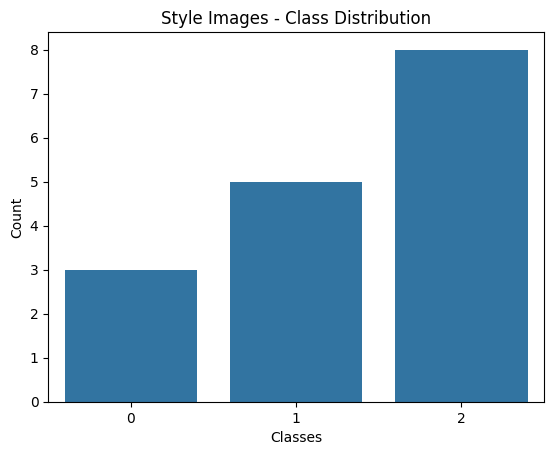

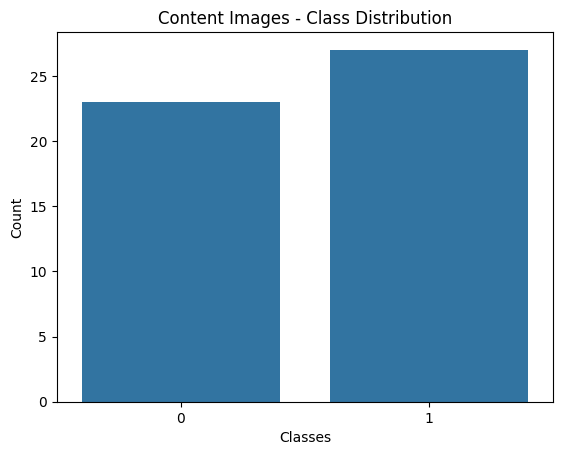

Visualizing Style Samples:


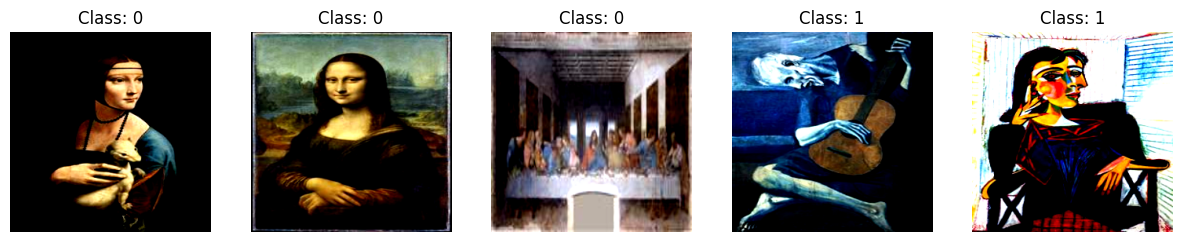

Visualizing Content Samples:


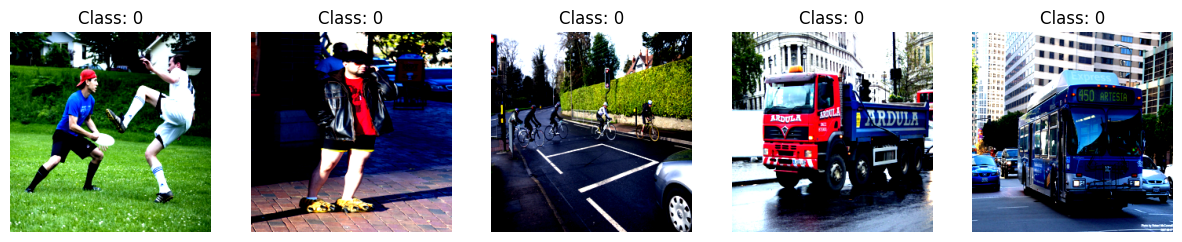

In [6]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import fiftyone.zoo as foz


transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

style_dataset_path = "/content/dataset/style_images"
style_dataset = datasets.ImageFolder(root=style_dataset_path, transform=transform)


print("Style Image Classes:", style_dataset.classes)


train_size = int(0.8 * len(style_dataset))
test_size = len(style_dataset) - train_size
style_train, style_test = random_split(style_dataset, [train_size, test_size])


style_train_loader = DataLoader(style_train, batch_size=16, shuffle=True, num_workers=2)
style_test_loader = DataLoader(style_test, batch_size=16, shuffle=False, num_workers=2)


content_dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=[],
    classes=["person", "car"],
    max_samples=50
)

output_dir = "/content/coco_content_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


for i, sample in enumerate(content_dataset):
    img_path = sample.filepath
    img_name = f"image_{i+1}.jpg"
    save_path = os.path.join(output_dir, img_name)
    shutil.copy(img_path, save_path)


class_labels = ["person", "car"]
class_dirs = {label: os.path.join(output_dir, label) for label in class_labels}
for class_dir in class_dirs.values():
    os.makedirs(class_dir, exist_ok=True)

image_files = [f for f in os.listdir(output_dir) if f.endswith('.jpg') or f.endswith('.png')]
for img_file in image_files:
    img_path = os.path.join(output_dir, img_file)
    label = random.choice(class_labels)
    save_path = os.path.join(class_dirs[label], img_file)
    shutil.copy(img_path, save_path)

# Reload Organized Content Dataset
content_dataset = datasets.ImageFolder(root=output_dir, transform=transform)


print("Content Image Classes:", content_dataset.classes)


def plot_class_distribution(dataset, title):
    labels = [item[1] for item in dataset.samples]
    sns.countplot(x=labels)
    plt.title(f"{title} - Class Distribution")
    plt.xlabel("Classes")
    plt.ylabel("Count")
    plt.show()


plot_class_distribution(style_dataset, "Style Images")
plot_class_distribution(content_dataset, "Content Images")


def visualize_samples(dataset, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        image, label = dataset[i]
        image = image.permute(1, 2, 0)
        image = (image * 0.5 + 0.5).clamp(0, 1)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image)
        plt.title(f"Class: {label}")
        plt.axis("off")
    plt.show()

print("Visualizing Style Samples:")
visualize_samples(style_dataset)

print("Visualizing Content Samples:")
visualize_samples(content_dataset)


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("CUDA is available. Using GPU.")
else:
    device = torch.device('cpu')
    print("CUDA is not available. Using CPU.")



class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),  # Downsample
            nn.ReLU(True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Tanh(),  # Output range [-1, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0)
        )

    def forward(self, x):
        return self.model(x).view(-1, 1)  # Flatten to (batch_size, 1)


generator = Generator().to(device)
discriminator = Discriminator().to(device)


CUDA is not available. Using CPU.


In [9]:
# Loss Functions
adversarial_loss = nn.BCELoss().cuda()
content_loss = nn.L1Loss().cuda()

# Optimizers
lr = 0.0002
beta1 = 0.5
beta2 = 0.999
optimizer_g = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, beta2))
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, beta2))


CUDA is not available. Please check your environment.
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [0/45], Batch [0/1], D Loss: 0.21294718980789185, G Loss: 2.457979202270508


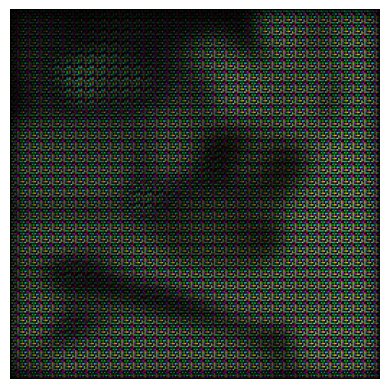

Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [1/45], Batch [0/1], D Loss: 0.2392720878124237, G Loss: 2.471759557723999
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [2/45], Batch [0/1], D Loss: 0.2898303270339966, G Loss: 2.7050182819366455
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [3/45], Batch [0/1], D Loss: 0.2191581130027771, G Loss: 2.822956085205078
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [4/45], Batch [0/1], D Loss: 0.19275525212287903, G Loss: 2.872117757797241
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32


Epoch [5/45], Batch [0/1], D Loss: 0.1810377836227417, G Loss: 2.942667245864868


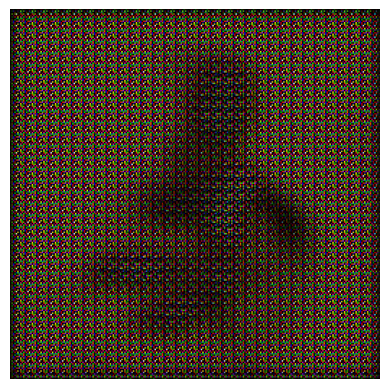

Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [6/45], Batch [0/1], D Loss: 0.1933782398700714, G Loss: 2.72910213470459
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [7/45], Batch [0/1], D Loss: 0.31066450476646423, G Loss: 3.1571197509765625
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [8/45], Batch [0/1], D Loss: 0.2508559226989746, G Loss: 3.2028675079345703
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [9/45], Batch [0/1], D Loss: 0.12980270385742188, G Loss: 3.073113203048706
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32


Epoch [10/45], Batch [0/1], D Loss: 0.12736308574676514, G Loss: 3.0493786334991455


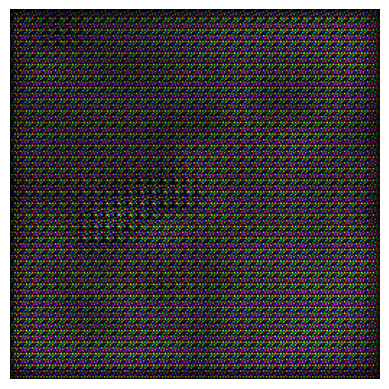

Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [11/45], Batch [0/1], D Loss: 0.12711581587791443, G Loss: 3.047494649887085
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [12/45], Batch [0/1], D Loss: 0.14106899499893188, G Loss: 3.281752586364746
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [13/45], Batch [0/1], D Loss: 0.12509728968143463, G Loss: 3.5509746074676514
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [14/45], Batch [0/1], D Loss: 0.10141621530056, G Loss: 3.6085855960845947
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32


Epoch [15/45], Batch [0/1], D Loss: 0.09769926965236664, G Loss: 3.6587016582489014


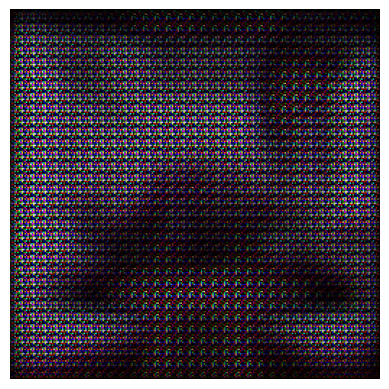

Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [16/45], Batch [0/1], D Loss: 0.08231178671121597, G Loss: 3.6254682540893555
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [17/45], Batch [0/1], D Loss: 0.09006411582231522, G Loss: 3.869877576828003
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [18/45], Batch [0/1], D Loss: 0.07863660901784897, G Loss: 3.9795217514038086
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [19/45], Batch [0/1], D Loss: 0.11246708035469055, G Loss: 4.159285068511963
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32


Epoch [20/45], Batch [0/1], D Loss: 0.0863492339849472, G Loss: 4.2803192138671875


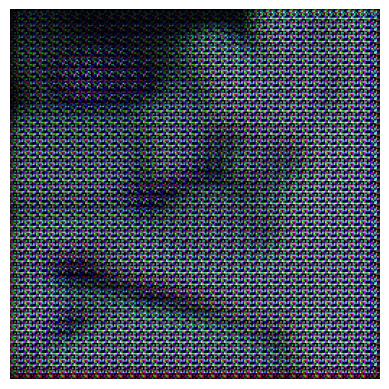

Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [21/45], Batch [0/1], D Loss: 0.07384699583053589, G Loss: 4.069124698638916
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [22/45], Batch [0/1], D Loss: 0.0637846291065216, G Loss: 3.8280954360961914
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [23/45], Batch [0/1], D Loss: 0.05772184208035469, G Loss: 3.9076690673828125
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [24/45], Batch [0/1], D Loss: 0.052009787410497665, G Loss: 4.093540668487549
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32


Epoch [25/45], Batch [0/1], D Loss: 0.05060363560914993, G Loss: 4.143781661987305


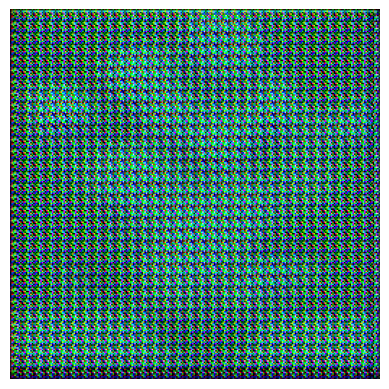

Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [26/45], Batch [0/1], D Loss: 0.046547576785087585, G Loss: 4.1916680335998535
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [27/45], Batch [0/1], D Loss: 0.04227612540125847, G Loss: 4.272517681121826
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [28/45], Batch [0/1], D Loss: 0.03991464525461197, G Loss: 4.19913911819458
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [29/45], Batch [0/1], D Loss: 0.045366138219833374, G Loss: 4.1991119384765625
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32


Epoch [30/45], Batch [0/1], D Loss: 0.03670849651098251, G Loss: 4.244598865509033


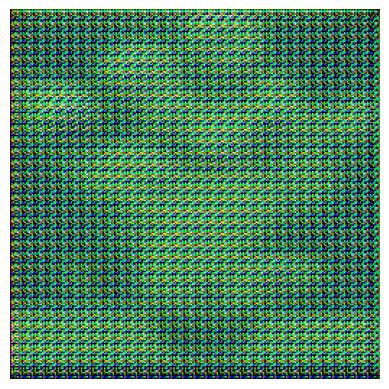

Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [31/45], Batch [0/1], D Loss: 0.03479766845703125, G Loss: 4.247200965881348
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [32/45], Batch [0/1], D Loss: 0.034493833780288696, G Loss: 4.281616687774658
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [33/45], Batch [0/1], D Loss: 0.035782914608716965, G Loss: 4.230708599090576
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [34/45], Batch [0/1], D Loss: 0.03595578670501709, G Loss: 4.3662190437316895
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32


Epoch [35/45], Batch [0/1], D Loss: 0.031051043421030045, G Loss: 4.363083362579346


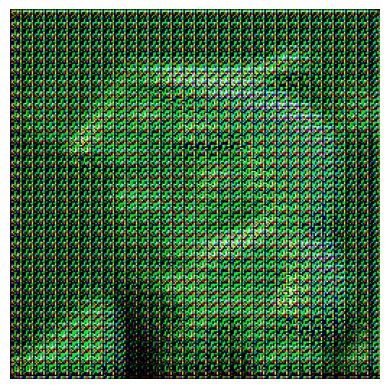

Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [36/45], Batch [0/1], D Loss: 0.029067929834127426, G Loss: 4.392603397369385
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [37/45], Batch [0/1], D Loss: 0.030794374644756317, G Loss: 4.397400856018066
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [38/45], Batch [0/1], D Loss: 0.02873331680893898, G Loss: 4.427191734313965
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [39/45], Batch [0/1], D Loss: 0.028225503861904144, G Loss: 4.512693881988525
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32


Epoch [40/45], Batch [0/1], D Loss: 0.027444403618574142, G Loss: 4.5513691902160645


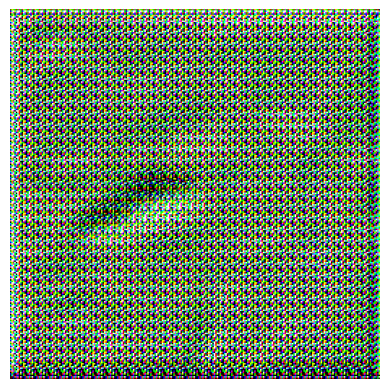

Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [41/45], Batch [0/1], D Loss: 0.023283902555704117, G Loss: 4.684453964233398
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [42/45], Batch [0/1], D Loss: 0.02092013880610466, G Loss: 4.616991996765137
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [43/45], Batch [0/1], D Loss: 0.02201346680521965, G Loss: 4.525599002838135
Batch 1
Content images shape: torch.Size([12, 3, 256, 256])
Content images dtype: torch.float32
Epoch [44/45], Batch [0/1], D Loss: 0.021749848499894142, G Loss: 4.621869087219238


In [14]:
import torch

num_epochs = 45


if not torch.cuda.is_available():
    print("CUDA is not available. Please check your environment.")
    device = torch.device('cpu')
else:
    device = torch.device('cuda')

for epoch in range(num_epochs):
    for batch_idx, (content_images, _) in enumerate(style_train_loader):
        print("Batch", batch_idx + 1)

        if torch.isnan(content_images).any() or torch.isinf(content_images).any():
            print("NaN or Inf detected in content_images!")

        print("Content images shape:", content_images.shape)
        print("Content images dtype:", content_images.dtype)


        content_images = content_images.to(device)
        real_labels = torch.ones(content_images.size(0), 1).to(device)
        fake_labels = torch.zeros(content_images.size(0), 1).to(device)

        # --- Discriminator training ---
        real_output = discriminator(content_images)
        real_output = real_output.view(content_images.size(0), -1)
        real_output = real_output.mean(dim=1, keepdim=True)
        real_output = torch.sigmoid(real_output)

        # Generate fake images
        generated_images = generator(content_images)

        fake_output = discriminator(generated_images.detach())
        fake_output = fake_output.view(content_images.size(0), -1)
        fake_output = fake_output.mean(dim=1, keepdim=True)
        fake_output = torch.sigmoid(fake_output)

        # Calculate losses
        real_loss = adversarial_loss(real_output, real_labels)
        fake_loss = adversarial_loss(fake_output, fake_labels)
        d_loss = (real_loss + fake_loss) / 2


        optimizer_d.zero_grad()
        d_loss.backward()
        optimizer_d.step()

        # --- Generator training ---
        generated_output = discriminator(generated_images)
        generated_output = generated_output.view(content_images.size(0), -1)  # Flatten the output
        generated_output = generated_output.mean(dim=1, keepdim=True)  # Average over spatial dimensions
        generated_output = torch.sigmoid(generated_output)  #

        g_loss = adversarial_loss(generated_output, real_labels)


        optimizer_g.zero_grad()
        g_loss.backward()
        optimizer_g.step()


        if batch_idx % 100 == 0:
            print(f"Epoch [{epoch}/{num_epochs}], Batch [{batch_idx}/{len(style_train_loader)}], "
                  f"D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

    # Save model checkpoint
    if epoch % 5 == 0:
        torch.save(generator.state_dict(), f"generator_epoch_{epoch}.pth")
        torch.save(discriminator.state_dict(), f"discriminator_epoch_{epoch}.pth")


        plt.imshow(generated_images[0].cpu().detach().numpy().transpose(1, 2, 0))
        plt.axis('off')
        plt.show()


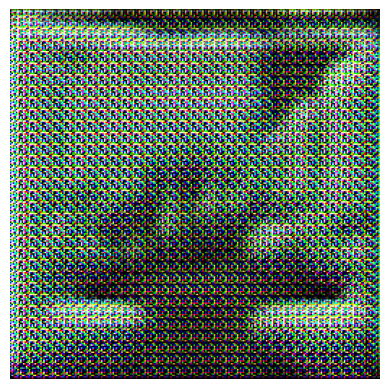

In [20]:

content_image = content_images[0].unsqueeze(0)
stylized_image = generator(content_image)


plt.imshow(stylized_image[0].cpu().detach().numpy().transpose(1, 2, 0))
plt.axis('off')
plt.show()


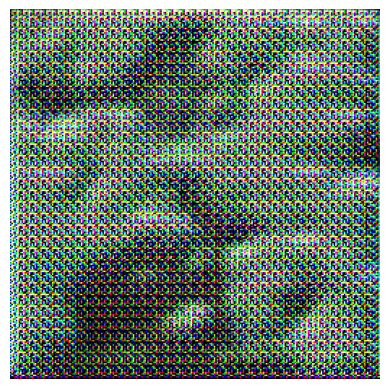

In [24]:

test_images = style_test_loader
for content_images, _ in test_images:
    generated_images = generator(content_images.to(device))

    plt.imshow(generated_images[0].cpu().detach().numpy().transpose(1, 2, 0))
    plt.axis('off')
    plt.show()



In [26]:
import os


folder_path = '/content/genimages'


os.makedirs(folder_path, exist_ok=True)

CUDA is not available. Using CPU.
Batch 1/1
Epoch [0/10], Batch [0/1], D Loss: 0.7060297727584839, G Loss: 1.61624014377594, Accuracy: 0.5000, Precision: 0.5000, Recall: 0.4167
Batch 1/1
Epoch [1/10], Batch [0/1], D Loss: 0.38922443985939026, G Loss: 1.9096704721450806, Accuracy: 0.9583, Precision: 1.0000, Recall: 0.9167
Batch 1/1
Epoch [2/10], Batch [0/1], D Loss: 0.2735150158405304, G Loss: 2.1493136882781982, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000
Batch 1/1
Epoch [3/10], Batch [0/1], D Loss: 0.2422110140323639, G Loss: 2.2860093116760254, Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000
Batch 1/1
Epoch [4/10], Batch [0/1], D Loss: 0.2728388011455536, G Loss: 2.304943084716797, Accuracy: 0.9583, Precision: 1.0000, Recall: 0.9167
Batch 1/1
Epoch [5/10], Batch [0/1], D Loss: 0.3685716390609741, G Loss: 2.2996582984924316, Accuracy: 0.9167, Precision: 0.8571, Recall: 1.0000
Batch 1/1
Epoch [6/10], Batch [0/1], D Loss: 0.4611007571220398, G Loss: 2.1415679454803467, Accur

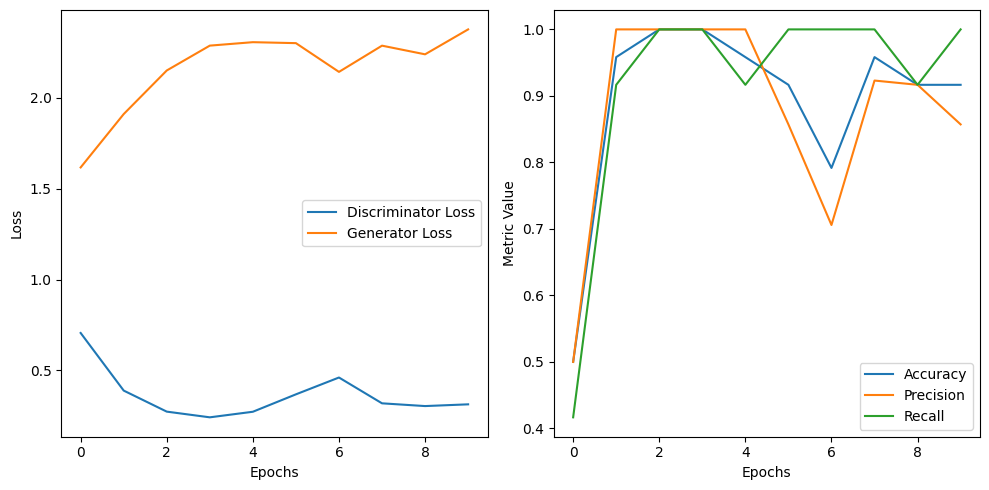

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import os
import matplotlib.pyplot as plt
from torchvision.utils import save_image
from pytorch_fid import fid_score
from sklearn.metrics import accuracy_score, precision_score, recall_score


if torch.cuda.is_available():
    device = torch.device('cuda')
    print("CUDA is available. Using GPU.")
else:
    device = torch.device('cpu')
    print("CUDA is not available. Using CPU.")

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Generator Model (U-Net)
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),  # Downsample
            nn.ReLU(True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Tanh(),  # Output range [-1, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Discriminator Model (PatchGAN)
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0)
        )

    def forward(self, x):
        return self.model(x).view(-1, 1)  # Flatten to (batch_size, 1)


generator = Generator().to(device)
discriminator = Discriminator().to(device)


adversarial_loss = nn.BCELoss().cuda()
content_loss = nn.L1Loss().cuda()


lr = 0.0002
beta1 = 0.5
beta2 = 0.999
optimizer_g = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, beta2))
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, beta2))


num_epochs = 10
real_images_path = "/content/dataset/style_images/da_vinci"
generated_images_path = "/content/genimages"
os.makedirs(generated_images_path, exist_ok=True)

d_losses = []
g_losses = []
accuracies = []
precisions = []
recalls = []


num_epochs = 10
real_images_path = "/content/dataset/style_images/da_vinci"
generated_images_path = "/content/genimages"
os.makedirs(generated_images_path, exist_ok=True)

for epoch in range(num_epochs):
    for batch_idx, (content_images, _) in enumerate(style_train_loader):
        print(f"Batch {batch_idx + 1}/{len(style_train_loader)}")

        if torch.isnan(content_images).any() or torch.isinf(content_images).any():
            print("NaN or Inf detected in content_images!")


        content_images = content_images.to(device)
        real_labels = torch.ones(content_images.size(0), 1).to(device)
        fake_labels = torch.zeros(content_images.size(0), 1).to(device)

        # --- Discriminator training ---
        real_output = discriminator(content_images)
        real_output = real_output.view(content_images.size(0), -1)
        real_output = real_output.mean(dim=1, keepdim=True)
        real_output = torch.sigmoid(real_output)

        # Generate fake images
        generated_images = generator(content_images)

        fake_output = discriminator(generated_images.detach())
        fake_output = fake_output.view(content_images.size(0), -1)
        fake_output = fake_output.mean(dim=1, keepdim=True)
        fake_output = torch.sigmoid(fake_output)

        # Calculate losses
        real_loss = adversarial_loss(real_output, real_labels)
        fake_loss = adversarial_loss(fake_output, fake_labels)
        d_loss = (real_loss + fake_loss) / 2


        optimizer_d.zero_grad()
        d_loss.backward()
        optimizer_d.step()

        # --- Generator training ---
        generated_output = discriminator(generated_images)
        generated_output = generated_output.view(content_images.size(0), -1)
        generated_output = generated_output.mean(dim=1, keepdim=True)
        generated_output = torch.sigmoid(generated_output)

        g_loss = adversarial_loss(generated_output, real_labels)


        optimizer_g.zero_grad()
        g_loss.backward()
        optimizer_g.step()


        d_losses.append(d_loss.item())
        g_losses.append(g_loss.item())


        real_preds = (real_output > 0.5).cpu().detach().numpy()
        fake_preds = (fake_output > 0.5).cpu().detach().numpy()
        real_labels_cpu = real_labels.cpu().detach().numpy().flatten()
        fake_labels_cpu = fake_labels.cpu().detach().numpy().flatten()


        all_preds = [*real_preds, *fake_preds]
        all_labels = [*real_labels_cpu, *fake_labels_cpu]

        accuracy = accuracy_score(all_labels, all_preds)
        precision = precision_score(all_labels, all_preds)
        recall = recall_score(all_labels, all_preds)

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)

        if batch_idx % 100 == 0:
            print(f"Epoch [{epoch}/{num_epochs}], Batch [{batch_idx}/{len(style_train_loader)}], "
                  f"D Loss: {d_loss.item()}, G Loss: {g_loss.item()}, "
                  f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")


    if epoch % 5 == 0:
        torch.save(generator.state_dict(), f"generator_epoch_{epoch}.pth")
        torch.save(discriminator.state_dict(), f"discriminator_epoch_{epoch}.pth")

        save_image(generated_images, os.path.join(generated_images_path, f"generated_image_{epoch}.png"))

        # Display generated images
       # plt.imshow(generated_images[0].cpu().detach().numpy().transpose(1, 2, 0))
       # plt.axis('off')
       # plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy')
plt.plot(precisions, label='Precision')
plt.plot(recalls, label='Recall')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.legend()

plt.tight_layout()
plt.show()


In [44]:
import torchvision.transforms as transforms
from pytorch_fid import fid_score
import os
from PIL import Image


resize_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])


def preprocess_images(image_dir, transform):
    processed_images = []
    for filename in os.listdir(image_dir):
        image_path = os.path.join(image_dir, filename)
        if os.path.isfile(image_path):
            image = Image.open(image_path).convert('RGB')
            image = transform(image)
            processed_images.append(image)
    return processed_images


real_images = preprocess_images(real_images_path, resize_transform)
generated_images = preprocess_images(generated_images_path, resize_transform)


temp_real_path = '/content/temp_real_images/'
temp_gen_path = '/content/temp_gen_images/'

os.makedirs(temp_real_path, exist_ok=True)
os.makedirs(temp_gen_path, exist_ok=True)

for idx, image in enumerate(real_images):
    save_image(image, os.path.join(temp_real_path, f"real_{idx}.png"))
for idx, image in enumerate(generated_images):
    save_image(image, os.path.join(temp_gen_path, f"generated_{idx}.png"))

# FID score evaluation
fid_value = fid_score.calculate_fid_given_paths(
    [temp_real_path, temp_gen_path],
    batch_size=1,
    device=device,
    dims=2048,
    num_workers=0
)

print(f"FID Score: {fid_value}")


100%|██████████| 2/2 [00:01<00:00,  1.80it/s]


FID Score: 518.2163441224254


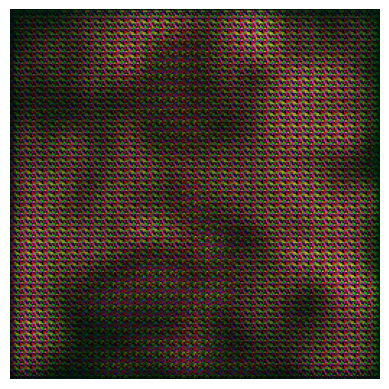

In [45]:

test_images = style_test_loader
for content_images, _ in test_images:
    generated_images = generator(content_images.to(device))

    plt.imshow(generated_images[0].cpu().detach().numpy().transpose(1, 2, 0))
    plt.axis('off')
    plt.show()


In [30]:
print(content_images.shape)  # Real images
print(generated_images.shape)  # Generated images

torch.Size([12, 3, 256, 256])
torch.Size([12, 3, 256, 256])
